In [7]:
"""
BASELINE MODEL: RANDOM FOREST

This model uses only time features: Year, month, hour, weekday
"""


SyntaxError: EOL while scanning string literal (<ipython-input-7-4d6e85a2ab58>, line 1)

In [283]:
import pandas as pd
from sklearn.model_selection import train_test_split

#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

import matplotlib.pyplot as plt

In [207]:
data_train_small = pd.read_csv('../data/output/train_data_small.csv').dropna()
data_test_small = pd.read_csv('../data/output/test_data_small.csv').dropna()
data_train_small.head(3)

,collision,hour_cos,hour_sin,month_cos,month_sin,segment_id,sun_elevation_angle,prec_duration,prec_height,temperature,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,1,-0.576680,-0.816970,0.866025,0.5,6209.0,8.940090,3.506667,0.044000,5.94,...,0,1,0,0,0,0,0,0,0,0
1,1,-0.990686,0.136167,0.866025,0.5,41374.0,14.868199,0.313333,0.000133,4.60,...,0,0,0,0,0,0,0,0,0,0
2,1,-0.990686,0.136167,0.866025,0.5,41373.0,14.868199,0.313333,0.000133,4.60,...,0,0,0,0,0,0,0,0,0,0


In [208]:
data_train_big = pd.read_csv('../data/output/train_data_big.csv').dropna()
pd.read_csv('../data/outputdata_test_big/test_data_big.csv').dropna()
data_train_big.head(3)

,collision,hour_cos,hour_sin,month_cos,month_sin,segment_id,sun_elevation_angle,prec_duration,prec_height,temperature,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,1,-0.576680,-0.816970,0.866025,0.5,6209.0,8.940090,3.506667,0.044000,5.94,...,0,1,0,0,0,0,0,0,0,0
1,1,-0.990686,0.136167,0.866025,0.5,41374.0,14.868199,0.313333,0.000133,4.60,...,0,0,0,0,0,0,0,0,0,0
2,1,-0.990686,0.136167,0.866025,0.5,41373.0,14.868199,0.313333,0.000133,4.60,...,0,0,0,0,0,0,0,0,0,0


In [233]:
data_test_big.columns

Index(['collision', 'hour_cos', 'hour_sin', 'month_cos', 'month_sin',
       'segment_id', 'sun_elevation_angle', 'prec_duration', 'prec_height',
       'temperature', 'humidity', 'visibility', 'width', 'length',
       'collision_cnt', 'year_2018', 'year_2019', 'year_2020', 'month_1',
       'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7',
       'month_8', 'month_9', 'month_10', 'month_11', 'month_12', 'day_1',
       'day_2', 'day_3', 'day_4', 'day_5', 'day_6', 'day_7', 'hour_0',
       'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7',
       'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13',
       'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19',
       'hour_20', 'hour_21', 'hour_22', 'hour_23'],
      dtype='object')

In [266]:
# Split dataset into training set and test set
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33) # 70% training and 30% test
X_train_small = data_train_small[['hour_cos', 'hour_sin', 'month_cos', 'month_sin','collision_cnt']]
X_test_small = data_test_small[['hour_cos', 'hour_sin', 'month_cos', 'month_sin','collision_cnt']]
y_train_small = data_train_small['collision']
y_test_small = data_test_small['collision']

In [267]:
# Split dataset into training set and test set
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33) # 70% training and 30% test
X_train_big = data_train_big[['hour_cos', 'hour_sin', 'month_cos', 'month_sin','collision_cnt']]
X_test_big = data_test_big[['hour_cos', 'hour_sin', 'month_cos', 'month_sin','collision_cnt']]
y_train_big = data_train_big['collision']
y_test_big = data_test_big['collision']

In [268]:
#Create a Gaussian Classifier
clf_small=RandomForestClassifier(n_estimators=100, 
                                max_depth=17,
                                min_samples_leaf=10,
                                max_leaf_nodes=32)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf_small.fit(X_train_small,y_train_small)



RandomForestClassifier(max_depth=17, max_leaf_nodes=32, min_samples_leaf=10)

In [269]:
#Create a Gaussian Classifier
clf_big=RandomForestClassifier(n_estimators=100, 
                               max_depth=17,
                               min_samples_leaf=10,
                               max_leaf_nodes=32)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf_big.fit(X_train_big,y_train_big)



RandomForestClassifier(max_depth=17, max_leaf_nodes=32, min_samples_leaf=10)

In [270]:
y_pred_small=clf_small.predict(X_test_small)
y_pred_big=clf_small.predict(X_test_big)

In [275]:
# Model Accuracy, how often is the classifier correct?
print("ROC_AUC:",metrics.roc_auc_score(y_test_small, y_pred_small))
print("Recall:",metrics.recall_score(y_test_small, y_pred_small))
print("F1:",metrics.f1_score(y_test_small, y_pred_small))
print("Precision:",metrics.precision_score(y_test_small, y_pred_small))

ROC_AUC: 0.732387893503151
Recall: 0.7044841364707489
F1: 0.6024180830558964
Precision: 0.5261842205953626


In [274]:
# Model Accuracy, how often is the classifier correct?
print("ROC_AUC:",metrics.roc_auc_score(y_test_big, y_pred_big))
print("Recall:",metrics.recall_score(y_test_big, y_pred_big))
print("F1:",metrics.f1_score(y_test_big, y_pred_big))
print("Precision:",metrics.precision_score(y_test_big, y_pred_big))

ROC_AUC: 0.7318233599620071
Recall: 0.7044841364707489
F1: 0.22843347877123432
Precision: 0.13631767807934023


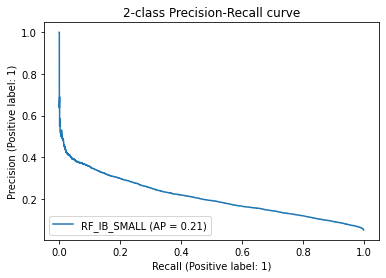

In [223]:
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay

display = PrecisionRecallDisplay.from_estimator(
    clf_big, X_test_big, y_test_big, name="RF_IB_SMALL"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

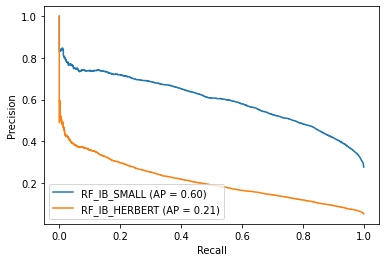

In [302]:
PrecisionRecallDisplay.from_estimator(
    clf_small, X_test_small, y_test_small, name="RF_IB_SMALL", ax=plt.gca()
)

PrecisionRecallDisplay.from_estimator(
    clf_big, X_test_big, y_test_big, name="RF_IB_HERBERT", ax=plt.gca()
)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.savefig("rand_forest_prec_rec_curve.png", bbox_inches='tight')


Text(0.5, 0, 'Recall')

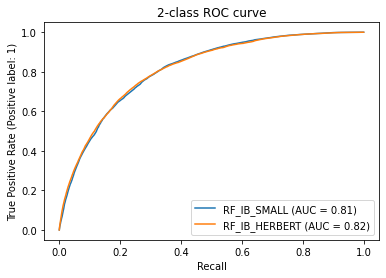

In [297]:
RocCurveDisplay.from_estimator(
    clf_small, X_test_small, y_test_small, name="RF_IB_SMALL", ax=plt.gca()
)

RocCurveDisplay.from_estimator(
    clf_big, X_test_big, y_test_big, name="RF_IB_HERBERT", ax=plt.gca()
)
plt.title('2-class ROC curve')

In [94]:
clf_small.feature_importances_

array([2.13640718e-01, 1.72848232e-01, 1.96286573e-02, 5.63821385e-03,
       3.57416964e-01, 5.11391490e-03, 4.88690024e-03, 4.51241072e-02,
       1.14519507e-01, 1.55502903e-02, 1.22776594e-02, 3.32263953e-02,
       8.28682242e-05, 4.55718692e-05])

In [95]:
clf_small.feature_names_in_

array(['hour_cos', 'hour_sin', 'month_cos', 'month_sin',
       'sun_elevation_angle', 'prec_duration', 'prec_height',
       'temperature', 'humidity', 'visibility', 'width', 'length',
       'year_2018', 'year_2019'], dtype=object)

In [276]:
forest_importances = pd.Series(clf_big.feature_importances_, index=clf_big.feature_names_in_)

In [277]:
import time
import numpy as np

start_time = time.time()
importances = clf_big.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_big.estimators_], axis=0)
elapsed_time = time.time() - start_time

Text(0, 0.5, 'Mean decrease in impurity')

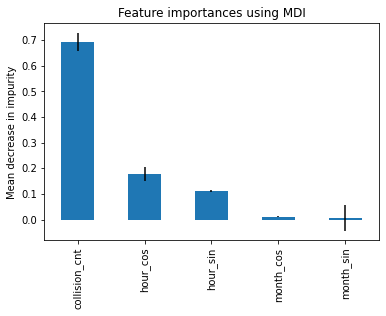

In [278]:
fig, ax = plt.subplots()
forest_importances.sort_values(axis=0, ascending=False).plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")


In [280]:
fig.savefig("feature_importance_hebert.png",bbox_inches='tight')

In [285]:
model2 = LogisticRegression(solver='liblinear', C=10, random_state=0).fit(X_train_big, y_train_big)

In [290]:
model2_pred = model2.predict(X_test_big)

In [294]:
metrics.roc_auc_score(y_test_big, model2.decision_function(X_test_big))

0.8049879840808768